<a href="https://colab.research.google.com/github/PedroTricossi/Analise-de-dados/blob/master/MNIST_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import sklearn
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.multiclass import OneVsRestClassifier

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [0]:
X, y = mnist['data'], mnist['target']

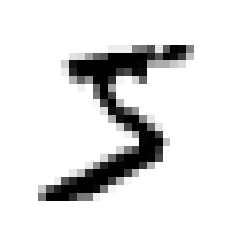

In [4]:
some_digit = X[0]

some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")

plt.show()

In [5]:
y[0]

'5'

In [6]:
y.astype(np.uint8)

array([5, 0, 4, ..., 4, 5, 6], dtype=uint8)

In [0]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [0]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [0]:
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

In [0]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')

array([0.87365, 0.85835, 0.8689 ])

In [0]:
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

In [0]:
svm_clf = SVC(gamma='auto', random_state=42)
svm_clf.fit(X_train, y_train)

In [0]:
cross_val_score(svm_clf, X_train, y_train, cv=3, scoring='accuracy')

In [0]:
cross_val_score(svm_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

In [0]:
svm_clf_std = SVC(gamma='auto', random_state=42)
svm_clf_std.fit(X_train_scaled, y_train)

In [0]:
cross_val_score(svm_clf_std, X_train_scaled, y_train, cv=3, scoring="accuracy")

In [0]:
zx\smv_score = svm_clf.decision_function([some_digit])
smv_score

In [0]:
ovr_clf = OneVsRestClassifier(SVC(gamma='auto', random_state=42))
ovr_clf.fit(X_train, y_train)
ovr_clf.predict([some_digit])